In [3]:
import requests #packages that is used to download the content from web
import os # package used for file process
from bs4 import BeautifulSoup as bs #a Python library for pulling data out of HTML and XML files
import pandas as pd
import numpy as np
import re

In [311]:
all_books=[]

In [313]:
url = "https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page=1"
def get_page(url):
    page = requests.get(url)
    status = page.status_code
    soup = bs(page.text, "html.parser" )
    return [soup,status]

In [314]:
def get_links(soup):
    links = []
    listings = soup.find_all('a' ,{'class' : 'bookTitle'})
    for listing in listings:
        bk_lnk = listing.get("href")
        base_url="https://www.goodreads.com"
        cmplt_link=base_url + bk_lnk
        links.append(cmplt_link)
    return links

In [319]:
#extract info from each link
def extract_info(links):
    for link in links:
        res = requests.get(link)
        bsoup = bs(res.text, "html.parser")
        try:
            title = bsoup.find('h1', {'id':'bookTitle'}).text.strip()
            author=bsoup.find('span', {'itemprop':'name'}).text.strip()
            average_rating= bsoup.find('span', {'itemprop':'ratingValue'}).text.strip()
            genres = bsoup.find_all(class_='actionLinkLite bookPageGenreLink')
            #genres = [genre.text.strip() for genre in genres]
            language = bsoup.find('div' , {'itemprop' : 'inLanguage'}).text.strip()
            description =bsoup.find('div', {'id': 'description'}).find_all('span')[-1].text.strip()
        except AttributeError:
            continue

        book={'title': title,'author': author,'average_rating':average_rating,'genres':genres,'language':language,'description':description}
        all_books.append(book)
    
    return (len(all_books))

In [325]:
for x in range (2,31):
    #while True:
    url = f"https://www.goodreads.com/list/show/264.Books_That_Everyone_Should_Read_At_Least_Once?page={x}"
    soup_status = get_page(url)
    if soup_status[1] == 200:
        print(f"scraping page {x}")
        extract_info(get_links(soup_status[0]))
        print(len(all_books))
    else:
        print("The End")
        break

scraping page 2
176
scraping page 3
269
scraping page 4
360
scraping page 5
448
scraping page 6
532
scraping page 7
614
scraping page 8
701
scraping page 9
782
scraping page 10
867
scraping page 11
947
scraping page 12
1034
scraping page 13
1121
scraping page 14
1204
scraping page 15
1289
scraping page 16
1373
scraping page 17
1460
scraping page 18
1539
scraping page 19
1626
scraping page 20
1711
scraping page 21
1793
scraping page 22
1874
scraping page 23
1962
scraping page 24
2039
scraping page 25
2119
scraping page 26
2203
scraping page 27
2282
scraping page 28
2358
scraping page 29
2433
scraping page 30
2515


In [327]:
maf= pd.DataFrame(all_books)
maf.to_csv('book_list_30.csv', index=False)
print('Fin.' )

Fin.


In [328]:
maf

,title,author,average_rating,genres,language,description
0,To Kill a Mockingbird,Harper Lee,4.27,"[Classics, Fiction, Historical, Historical Fic...",English,The unforgettable novel of a childhood in a sl...
1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,"[Fantasy, Fiction, Young Adult, Fantasy, Magic...",English,Harry Potter's life is miserable. His parents ...
2,Pride and Prejudice,Jane Austen,4.27,"[Classics, Fiction, Romance, Historical, Histo...",English,Alternate cover edition of ISBN 9780679783268S...
3,The Diary of a Young Girl,Anne Frank,4.17,"[Nonfiction, Classics, History, Biography, Aut...",English,Discovered in the attic in which she spent the...
4,Animal Farm,George Orwell,3.97,"[Classics, Fiction, Science Fiction, Dystopia,...",English,Librarian's note: There is an Alternate Cover ...
...,...,...,...,...,...,...
2510,Faust,Johann Wolfgang von Goethe,3.93,"[Classics, Fiction, Poetry, Plays, Literature,...",Multiple languages,Goethe’s Faust reworks the late medieval myth ...
2511,The Paying Guests,Sarah Waters,3.45,"[Historical, Historical Fiction, Fiction, LGBT...",English,"It is 1922, and London is tense. Ex-servicemen..."
2512,The Ask and the Answer,Patrick Ness,4.17,"[Young Adult, Science Fiction, Dystopia, Scien...",English,"We were in the square, in the square where I'd..."
2513,I Will Wait for You: Eternal Bliss,Linda Masemore Pirrung,4.44,[Romance],English,Sidney Scofield and Alexandra Deveaux spent th...


In [155]:
df=pd.read_csv('D://project book recommedation system//books_data_50_1.csv')

In [156]:
df.head()

,Unnamed: 0,book_id,title,author,average_rating,genre,description,url,image_url
0,0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...
1,1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...
2,2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...
3,3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...
4,4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...


In [157]:
df=df.drop(['Unnamed: 0'],axis=1)

In [158]:
df.head()

,book_id,title,author,average_rating,genre,description,url,image_url
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...


In [159]:
print(df.title[1])
print(df.description[1])

Harry Potter and the Sorcerer's Stone
Harry Potter's life is miserable. His parents are dead and he's stuck with his heartless relatives, who force him to live in a tiny closet under the stairs. But his fortune changes when he receives a letter that tells him the truth about himself: he's a wizard. A mysterious visitor rescues him from his relatives and takes him to his new home, Hogwarts School of Witchcraft and Wizardry.After a lifetime of bottling up his magical powers, Harry finally feels like a normal kid. But even within the Wizarding community, he is special. He is the boy who lived: the only person to have ever survived a killing curse inflicted by the evil Lord Voldemort, who launched a brutal takeover of the Wizarding world, only to vanish after failing to kill Harry.Though Harry's first year at Hogwarts is the best of his life, not everything is perfect. There is a dangerous secret object hidden within the castle walls, and Harry believes it's his responsibility to prevent i

In [160]:
df.shape

(4305, 8)

In [161]:
df.isnull().sum()

book_id           0
title             0
author            0
average_rating    0
genre             0
description       0
url               0
image_url         0
dtype: int64

In [162]:
print(df.duplicated().sum())
df[df.duplicated()]

0


,book_id,title,author,average_rating,genre,description,url,image_url


In [163]:
df=df.drop_duplicates()

In [164]:
df.shape

(4305, 8)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4305 entries, 0 to 4304
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         4305 non-null   int64  
 1   title           4305 non-null   object 
 2   author          4305 non-null   object 
 3   average_rating  4305 non-null   float64
 4   genre           4305 non-null   object 
 5   description     4305 non-null   object 
 6   url             4305 non-null   object 
 7   image_url       4305 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 302.7+ KB


In [166]:
df['genre'].value_counts()

Fiction        991
Nonfiction     497
Fantasy        417
Classics       337
Young Adult    230
              ... 
Suspense         1
LGBT             1
Academic         1
Sports           1
Gender           1
Name: genre, Length: 87, dtype: int64

# Distribution as per genre

<AxesSubplot:>

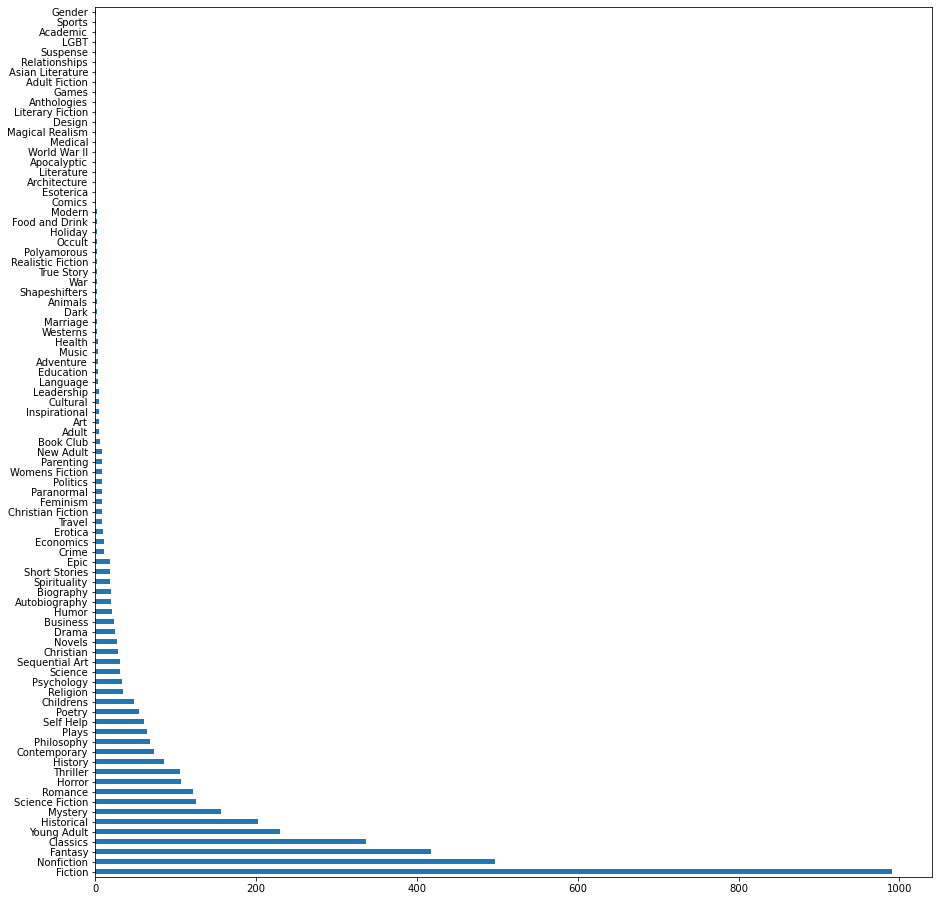

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
df['genre'].value_counts().plot(kind='barh',figsize=(15,16))

In [168]:
#print the title and description of a random sample
print(df['title'][15])
df['description'][20]

The Kite Runner


'Generations of readers young and old, male and female, have fallen in love with the March sisters of Louisa May Alcott’s most popular and enduring novel, Little Women. Here are talented tomboy and author-to-be Jo, tragically frail Beth, beautiful Meg, and romantic, spoiled Amy, united in their devotion to each other and their struggles to survive in New England during the Civil War.It is no secret that Alcott based Little Women on her own early life. While her father, the freethinking reformer and abolitionist Bronson Alcott, hobnobbed with such eminent male authors as Emerson, Thoreau, and Hawthorne, Louisa supported herself and her sisters with "woman’s work,” including sewing, doing laundry, and acting as a domestic servant. But she soon discovered she could make more money writing. Little Women brought her lasting fame and fortune, and far from being the "girl’s book” her publisher requested, it explores such timeless themes as love and death, war and peace, the conflict between p

In [169]:
df['author'].value_counts()

Stephen King           45
John Grisham           23
William Shakespeare    20
C.S. Lewis             20
Terry Pratchett        18
                       ..
Svetlana Alexievich     1
Jussi Adler-Olsen       1
A.F. Knott              1
Catherine Steadman      1
Ottessa Moshfegh        1
Name: author, Length: 2563, dtype: int64

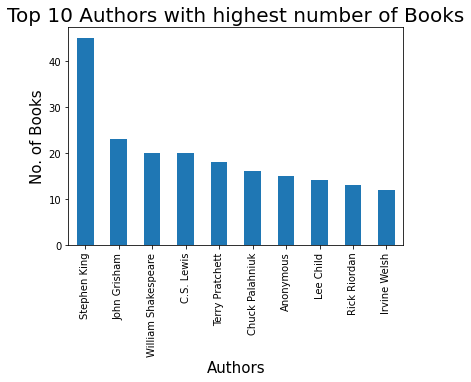

In [170]:
df["author"].value_counts().sort_values(ascending=False).head(10).plot.bar()#color=color
plt.title("Top 10 Authors with highest number of Books",fontsize=20)
plt.xlabel("Authors",fontsize=15)
plt.ylabel("No. of Books",fontsize=15)
plt.show()

In [171]:
#genres which have books more than 50
print((df['genre'].value_counts()>50).sum())
df['genre'].value_counts().loc[lambda x : x>50] 

17


Fiction            991
Nonfiction         497
Fantasy            417
Classics           337
Young Adult        230
Historical         203
Mystery            157
Science Fiction    126
Romance            122
Horror             107
Thriller           106
History             86
Contemporary        73
Philosophy          68
Plays               65
Self Help           61
Poetry              55
Name: genre, dtype: int64

In [172]:
gh=df

In [173]:
gh.head()

,book_id,title,author,average_rating,genre,description,url,image_url
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...


In [174]:
#filterting genres with books more than 100
gh=gh.groupby("genre").filter(lambda x: len(x) > 100)

In [175]:
gh['genre'].value_counts()

Fiction            991
Nonfiction         497
Fantasy            417
Classics           337
Young Adult        230
Historical         203
Mystery            157
Science Fiction    126
Romance            122
Horror             107
Thriller           106
Name: genre, dtype: int64

array([<AxesSubplot:ylabel='genre'>], dtype=object)

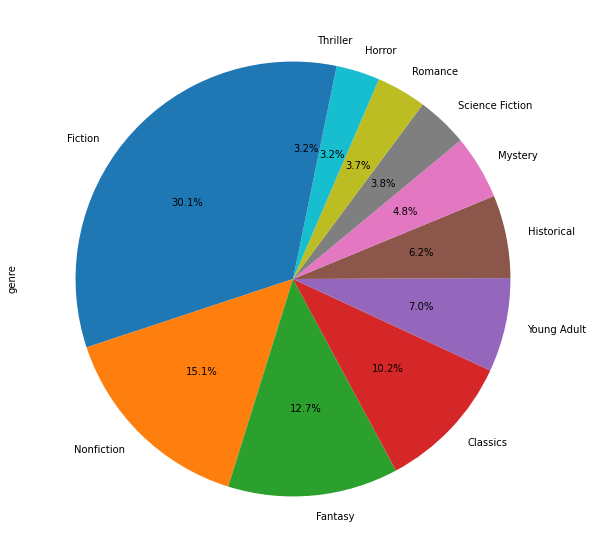

In [177]:
gh.genre.value_counts().plot(kind='pie', subplots=True, startangle=90,
figsize=(15,10), autopct='%1.1f%%')

<AxesSubplot:title={'center':'Word Count Distribution for book descriptions'}, ylabel='Frequency'>

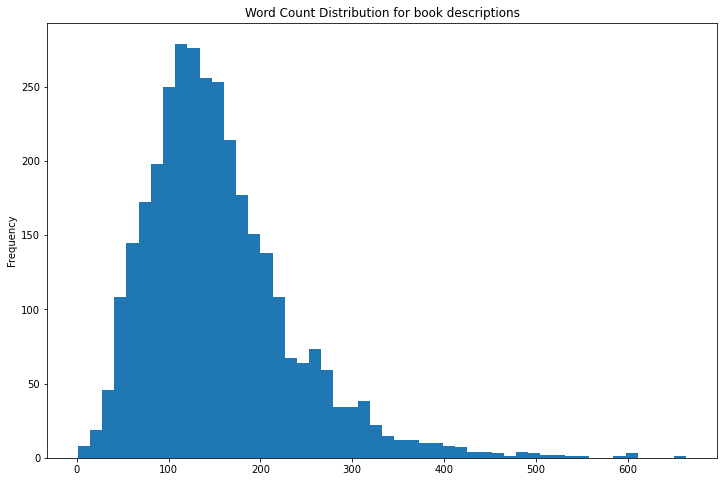

In [178]:
#word count based on cleaned text
gh['word_count'] = gh['description'].apply(lambda x: len(str(x).split()))# Plotting the word count
gh['word_count'].plot(kind='hist',bins = 50,figsize = (12,8),title='Word Count Distribution for book descriptions')

In [179]:
gh.head()

,book_id,title,author,average_rating,genre,description,url,image_url,word_count
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123


<AxesSubplot:>

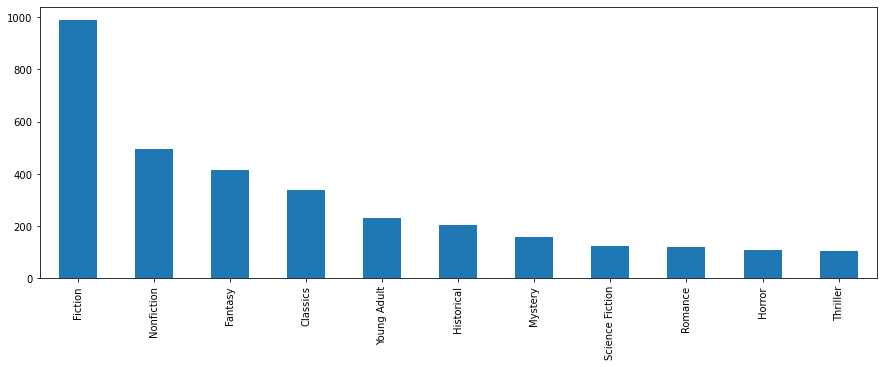

In [180]:
gh['genre'].value_counts().plot(x='genre', y='count', kind='bar', figsize=(15,5))

<Figure size 864x720 with 0 Axes>

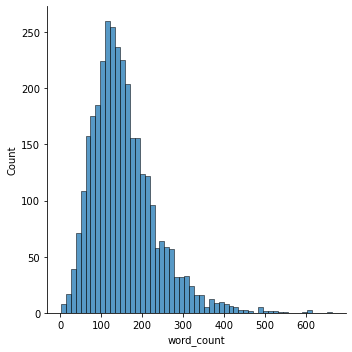

In [181]:
plt.figure(figsize=[12,10])
sns.displot(gh['word_count'])

In [182]:
gh1 = gh[(gh.genre == 'Fiction') & (gh.word_count <= 160)]
gh1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 624 entries, 15 to 4298
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   book_id         624 non-null    int64  
 1   title           624 non-null    object 
 2   author          624 non-null    object 
 3   average_rating  624 non-null    float64
 4   genre           624 non-null    object 
 5   description     624 non-null    object 
 6   url             624 non-null    object 
 7   image_url       624 non-null    object 
 8   word_count      624 non-null    int64  
dtypes: float64(1), int64(2), object(6)
memory usage: 48.8+ KB


In [183]:
# dropping the  rows created in gh1 from the gh column.
gh.drop(gh1.index,axis=0,inplace=True)

In [184]:
gh.shape

(2669, 9)

In [185]:
gh['genre'].value_counts()

Nonfiction         497
Fantasy            417
Fiction            367
Classics           337
Young Adult        230
Historical         203
Mystery            157
Science Fiction    126
Romance            122
Horror             107
Thriller           106
Name: genre, dtype: int64

In [186]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
gh['genre_le'] = le.fit_transform(gh.genre)

In [187]:
gh.head()

,book_id,title,author,average_rating,genre,description,url,image_url,word_count,genre_le
0,2657,To Kill a Mockingbird,Harper Lee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137,0
1,3,Harry Potter and the Sorcerer's Stone,J.K. Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220,1
2,1885,Pride and Prejudice,Jane Austen,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100,0
3,48855,The Diary of a Young Girl,Anne Frank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166,6
4,170448,Animal Farm,George Orwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123,0


In [188]:
gh['title'] = gh['title'].str.replace(" ", "")
gh['author'] = gh['author'].str.replace(" ", "")

In [189]:
gh['tags'] = gh['title'] + " " + gh['author'] + " " + gh['description']

In [190]:
gh.head()

,book_id,title,author,average_rating,genre,description,url,image_url,word_count,genre_le,tags
0,2657,ToKillaMockingbird,HarperLee,4.27,Classics,The unforgettable novel of a childhood in a sl...,https://www.goodreads.com/book/show/2657.To_Ki...,https://i.gr-assets.com/images/S/compressed.ph...,137,0,ToKillaMockingbird HarperLee The unforgettable...
1,3,HarryPotterandtheSorcerer'sStone,J.K.Rowling,4.47,Fantasy,Harry Potter's life is miserable. His parents ...,https://www.goodreads.com/book/show/3.Harry_Po...,https://i.gr-assets.com/images/S/compressed.ph...,220,1,HarryPotterandtheSorcerer'sStone J.K.Rowling H...
2,1885,PrideandPrejudice,JaneAusten,4.27,Classics,Alternate cover edition of ISBN 9780679783268S...,https://www.goodreads.com/book/show/1885.Pride...,https://i.gr-assets.com/images/S/compressed.ph...,100,0,PrideandPrejudice JaneAusten Alternate cover e...
3,48855,TheDiaryofaYoungGirl,AnneFrank,4.17,Nonfiction,Discovered in the attic in which she spent the...,https://www.goodreads.com/book/show/48855.The_...,https://i.gr-assets.com/images/S/compressed.ph...,166,6,TheDiaryofaYoungGirl AnneFrank Discovered in t...
4,170448,AnimalFarm,GeorgeOrwell,3.97,Classics,Librarian's note: There is an Alternate Cover ...,https://www.goodreads.com/book/show/170448.Ani...,https://i.gr-assets.com/images/S/compressed.ph...,123,0,AnimalFarm GeorgeOrwell Librarian's note: Ther...


In [191]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import nltk
from nltk.corpus import stopwords
stopwords.words('english')

import re

import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [192]:
def cleaned_text(content):
    #removing everything other than alphabets and numbers with spaces
    content = re.sub('\W+', ' ', content)
    
    #lowercase
    content=content.lower()
    
    # separating sentences in word
    content=nltk.word_tokenize(content)
    
    wrd=[]
    #removing stopwords and punctuations       
    for i in content:
        if i not in stopwords.words('english') and i not in string.punctuation:
            wrd.append(i)
            
    content = wrd[:]
    wrd.clear()
    
   #stemming 
    for i in content:
        wrd.append(ps.stem(i))
    
    return " ".join(wrd)

In [193]:
cleaned_text("Librarian's note: An alternate cover edition can be found hereIt is 1939. Nazi Germany. The country is holding its breath. Death has never been busier, and will be busier still.By her brother's graveside, Liesel's life is changed when she picks up a single object, partially hidden in the snow. It is The Gravedigger's Handbook, left behind there by accident, and it is her f\r\nLibrarian's note: An alternate cover edition can be found hereIt is 1939. Nazi Germany. The country is holding its breath. Death has never been busier, and will be busier still.By her brother's graveside, Liesel's life is changed when she picks up a single object, partially hidden in the snow. It is The Gravedigger's Handbook, left behind there by accident, and it is her first act of book thievery. So begins a love affair with books and words, as Liesel, with the help of her accordian-playing foster father, learns to read. Soon she is stealing books from Nazi book-burnings, the mayor's wife's library, wherever there are books to be found.But these are dangerous times. When Liesel's foster family hides a Jew in their basement, Liesel's world is both opened up, and closed down.In superbly crafted writing that burns with intensity, award-winning author Markus Zusak has given us one of the most enduring stories of our time.(Note: this title was not published as YA fiction)\r\n...more")

'librarian note altern cover edit found hereit 1939 nazi germani countri hold breath death never busier busier still brother gravesid liesel life chang pick singl object partial hidden snow gravedigg handbook left behind accid f librarian note altern cover edit found hereit 1939 nazi germani countri hold breath death never busier busier still brother gravesid liesel life chang pick singl object partial hidden snow gravedigg handbook left behind accid first act book thieveri begin love affair book word liesel help accordian play foster father learn read soon steal book nazi book burn mayor wife librari wherev book found danger time liesel foster famili hide jew basement liesel world open close superbl craft write burn intens award win author marku zusak given us one endur stori time note titl publish ya fiction'

In [194]:
gh['tags'] = gh['tags'].apply(cleaned_text)

In [195]:
gh['tags']

0       tokillamockingbird harperle unforgett novel ch...
1       harrypotterandthesorcer sstone j k rowl harri ...
2       prideandprejudic janeausten altern cover edit ...
3       thediaryofayounggirl annefrank discov attic sp...
4       animalfarm georgeorwel librarian note altern c...
                              ...                        
4299    noblebegin l ryan ace asin b009k8rhnqin march ...
4300    everneath brodiashton last spring nikki becket...
4301    endofwatch stephenk spectacular final new york...
4302    salvagethebon jesmynward winner 2011 nation bo...
4303    redsparrow jasonmatthew grand spi tale tradit ...
Name: tags, Length: 2669, dtype: object

In [196]:
X = pd.DataFrame(gh['tags']).reset_index(drop=True)

In [197]:
X

,tags
0,tokillamockingbird harperle unforgett novel ch...
1,harrypotterandthesorcer sstone j k rowl harri ...
2,prideandprejudic janeausten altern cover edit ...
3,thediaryofayounggirl annefrank discov attic sp...
4,animalfarm georgeorwel librarian note altern c...
...,...
2664,noblebegin l ryan ace asin b009k8rhnqin march ...
2665,everneath brodiashton last spring nikki becket...
2666,endofwatch stephenk spectacular final new york...
2667,salvagethebon jesmynward winner 2011 nation bo...


In [198]:
y = gh['genre_le'].reset_index(drop=True)

In [199]:
y

0        0
1        1
2        0
3        6
4        0
        ..
2664     9
2665    10
2666     4
2667     2
2668     2
Name: genre_le, Length: 2669, dtype: int32

In [200]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [201]:
#performing oversampling on all genres except genre class  2
strategy = {0:400, 1:400, 2:598, 3:400, 4:400, 5:400,6:400}
ovrsam = RandomOverSampler(sampling_strategy = strategy)

In [202]:
X_rs, y_rs = ovrsam.fit_resample(X,y)

ValueError: With over-sampling methods, the number of samples in a class should be greater or equal to the original number of samples. Originally, there is 417 samples and 400 samples are asked.

In [203]:
#performing undersampling on class 2
strategy = {0:400, 1:400, 2:400, 3:400, 4:400,5:400,6:400}
udrsam = RandomUnderSampler(sampling_strategy = strategy)

In [204]:
X_res, y_res = udrsam.fit_resample(X_rs,y_rs)

In [205]:
from collections import Counter
print(Counter(y_res))

Counter({0: 400, 1: 400, 2: 400, 3: 400, 4: 400, 5: 400, 6: 400})


<AxesSubplot:>

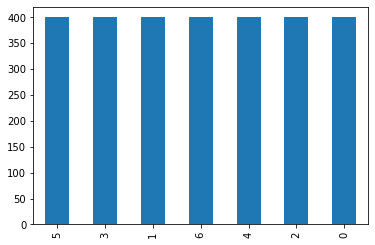

In [206]:
y_res.value_counts().plot(x='y_res',y = 'count',kind = 'bar')

In [207]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features = 10000)

In [208]:
Xa = cv.fit_transform(X_res['tags']).toarray()

In [209]:
Xa.shape

(2800, 10000)

In [210]:
ya = y_res.values

In [211]:
ya.shape

(2800,)

In [212]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Xa,ya,test_size = .25)

In [213]:
# Creating empty lists to store model training time, model predicting time, model accuracy scores, model precision scores.
training_time = []
predicting_time = []
test_accuracy_scores = []
train_accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [214]:
training_time.clear
predicting_time.clear
test_accuracy_scores.clear
train_accuracy_scores.clear
precision_scores.clear
recall_scores.clear
f1_scores.clear

<function list.clear()>

In [215]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report
from time import time

# NAIVE BAYES

In [216]:
gnb = GaussianNB()
mnb = MultinomialNB(alpha=0.5)

In [217]:
tt = time()
gnb.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred1 = gnb.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred1))
train_accuracy_scores.append(accuracy_score(y_train,train_pred1))

pt = time()
f_pred1 = gnb.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred1))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred1))
print('\nprecision score:',precision_score(y_test,f_pred1,average='weighted'))
print(classification_report(y_test, f_pred1))
test_accuracy_scores.append(accuracy_score(y_test,f_pred1))
precision_scores.append(precision_score(y_test,f_pred1,average='weighted'))


Training time: 0.429 s


Accuracy Score for training data:  0.9976190476190476

Predicting time: 0.44 s


Accuracy Score for test data: 0.7557142857142857

confusion matrix:
 [[ 47   6  35   2   2  14   0]
 [  1  70  15   2   1   8   2]
 [  1   1  59   1   0  21   1]
 [  2   0   7  75   0  10   0]
 [  0   0   3   0 114   3   0]
 [  2   1  19   0   0  80   0]
 [  0   1   8   0   0   2  84]]

precision score: 0.8165276772907342
              precision    recall  f1-score   support

           0       0.89      0.44      0.59       106
           1       0.89      0.71      0.79        99
           2       0.40      0.70      0.51        84
           3       0.94      0.80      0.86        94
           4       0.97      0.95      0.96       120
           5       0.58      0.78      0.67       102
           6       0.97      0.88      0.92        95

    accuracy                           0.76       700
   macro avg       0.80      0.75      0.76       700
weighted avg       0.82    

In [218]:
tt = time()
mnb.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred2 = mnb.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred2))
train_accuracy_scores.append(accuracy_score(y_train,train_pred2))

pt = time()
f_pred2 = mnb.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred2))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred2))
print('\nprecision score:',precision_score(y_test,f_pred2,average='weighted'))
print(classification_report(y_test, f_pred2))
test_accuracy_scores.append(accuracy_score(y_test,f_pred2))
precision_scores.append(precision_score(y_test,f_pred2,average='weighted'))


Training time: 0.917 s


Accuracy Score for training data:  0.99

Predicting time: 0.021 s


Accuracy Score for test data: 0.8571428571428571

confusion matrix:
 [[ 73   1  23   1   0   7   1]
 [  0  87   2   0   0   2   8]
 [  2   3  63   4   1  11   0]
 [  0   0  11  80   0   3   0]
 [  0   0   1   0 117   0   2]
 [  3   1   7   0   1  90   0]
 [  0   1   3   0   0   1  90]]

precision score: 0.8736581214123413
              precision    recall  f1-score   support

           0       0.94      0.69      0.79       106
           1       0.94      0.88      0.91        99
           2       0.57      0.75      0.65        84
           3       0.94      0.85      0.89        94
           4       0.98      0.97      0.98       120
           5       0.79      0.88      0.83       102
           6       0.89      0.95      0.92        95

    accuracy                           0.86       700
   macro avg       0.86      0.85      0.85       700
weighted avg       0.87      0.86      0

# SVM

In [219]:
from sklearn import svm
from sklearn.svm import SVC
tt = time()
SVM_model = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM_model.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred3 = SVM_model.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred3))
train_accuracy_scores.append(accuracy_score(y_train,train_pred3))

pt = time()
f_pred3 = SVM_model.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred3))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred3))
print('\nprecision score:',precision_score(y_test,f_pred3,average='weighted'))
print(classification_report(y_test, f_pred3))
test_accuracy_scores.append(accuracy_score(y_test,f_pred3))
precision_scores.append(precision_score(y_test,f_pred3,average='weighted'))


Training time: 17.833 s


Accuracy Score for training data:  1.0

Predicting time: 4.375 s


Accuracy Score for test data: 0.8157142857142857

confusion matrix:
 [[ 82   7   7   0   0   8   2]
 [  1  87   4   0   0   0   7]
 [ 10  13  40   5   2  12   2]
 [  5   0   5  80   0   2   2]
 [  0   0   1   0 119   0   0]
 [  8   4   7   5   0  76   2]
 [  2   2   2   1   0   1  87]]

precision score: 0.8108544927990631
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       106
           1       0.77      0.88      0.82        99
           2       0.61      0.48      0.53        84
           3       0.88      0.85      0.86        94
           4       0.98      0.99      0.99       120
           5       0.77      0.75      0.76       102
           6       0.85      0.92      0.88        95

    accuracy                           0.82       700
   macro avg       0.80      0.80      0.80       700
weighted avg       0.81      0.82      0

# K-NEIGHBOUR

In [220]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

In [221]:
tt = time()
knc.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred4 = knc.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred4))
train_accuracy_scores.append(accuracy_score(y_train,train_pred4))

pt = time()
f_pred4 = knc.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred4))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred4))
print('\nprecision score',precision_score(y_test,f_pred4,average='weighted'))
print(classification_report(y_test, f_pred4))
test_accuracy_scores.append(accuracy_score(y_test,f_pred4))
precision_scores.append(precision_score(y_test,f_pred4,average='weighted'))


Training time: 0.001 s


Accuracy Score for training data:  0.5738095238095238

Predicting time: 0.522 s


Accuracy Score for test data: 0.36714285714285716

confusion matrix:
 [[29 71  0  0  1  5  0]
 [10 84  0  0  2  3  0]
 [10 66  0  0  2  6  0]
 [ 2 48  0 42  1  1  0]
 [10 35  0  0 74  1  0]
 [23 68  0  0  2  9  0]
 [ 3 58  0  2  2 11 19]]

precision score 0.5294491809408753
              precision    recall  f1-score   support

           0       0.33      0.27      0.30       106
           1       0.20      0.85      0.32        99
           2       0.00      0.00      0.00        84
           3       0.95      0.45      0.61        94
           4       0.88      0.62      0.73       120
           5       0.25      0.09      0.13       102
           6       1.00      0.20      0.33        95

    accuracy                           0.37       700
   macro avg       0.52      0.35      0.35       700
weighted avg       0.53      0.37      0.36       700



C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN SRIVASTAVA\anaconda3\lib

# # RANDOM FOREST

In [222]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
tt = time()
rfc.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred5 = rfc.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred5))
train_accuracy_scores.append(accuracy_score(y_train,train_pred5))

pt = time()
f_pred5 = rfc.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred5))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred5))
print('\nprecision score',precision_score(y_test,f_pred5,average='weighted'))
print(classification_report(y_test, f_pred5))
test_accuracy_scores.append(accuracy_score(y_test,f_pred5))
precision_scores.append(precision_score(y_test,f_pred5,average='weighted'))


Training time: 2.868 s


Accuracy Score for training data:  1.0

Predicting time: 0.049 s


Accuracy Score for test data: 0.7885714285714286

confusion matrix:
 [[ 92   2   3   2   1   5   1]
 [  4  83   6   0   2   2   2]
 [ 25   9  27   4   1  14   4]
 [  5   1   7  77   0   3   1]
 [  0   0   1   0 119   0   0]
 [ 18   1   5   1   3  71   3]
 [  4   3   5   0   0   0  83]]

precision score 0.7864377850895207
              precision    recall  f1-score   support

           0       0.62      0.87      0.72       106
           1       0.84      0.84      0.84        99
           2       0.50      0.32      0.39        84
           3       0.92      0.82      0.87        94
           4       0.94      0.99      0.97       120
           5       0.75      0.70      0.72       102
           6       0.88      0.87      0.88        95

    accuracy                           0.79       700
   macro avg       0.78      0.77      0.77       700
weighted avg       0.79      0.79      0.7

#  DECISION TREE

In [223]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
tt = time()
dtc.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred6 = dtc.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred6))
train_accuracy_scores.append(accuracy_score(y_train,train_pred6))

pt = time()
f_pred6 = dtc.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred6))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred6))
print('\nprecision score',precision_score(y_test,f_pred6,average='weighted'))
print(classification_report(y_test, f_pred6))
test_accuracy_scores.append(accuracy_score(y_test,f_pred6))
precision_scores.append(precision_score(y_test,f_pred6,average='weighted'))


Training time: 1.311 s


Accuracy Score for training data:  0.36714285714285716

Predicting time: 0.016 s


Accuracy Score for test data: 0.3585714285714286

confusion matrix:
 [[10  2 24  2  1  4 63]
 [ 0 34  9  1  1  2 52]
 [ 2  3 26  0  0  8 45]
 [ 0  0 26 14  0  5 49]
 [ 0  0  6  0 64  3 47]
 [ 3  4  2  0  7 27 59]
 [ 0  2 16  0  1  0 76]]

precision score 0.6019549531178177
              precision    recall  f1-score   support

           0       0.67      0.09      0.17       106
           1       0.76      0.34      0.47        99
           2       0.24      0.31      0.27        84
           3       0.82      0.15      0.25        94
           4       0.86      0.53      0.66       120
           5       0.55      0.26      0.36       102
           6       0.19      0.80      0.31        95

    accuracy                           0.36       700
   macro avg       0.58      0.36      0.36       700
weighted avg       0.60      0.36      0.37       700



# LOGISTIC REGRESSION

In [224]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1')
tt = time()
lr.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred7 = lr.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred7))
train_accuracy_scores.append(accuracy_score(y_train,train_pred7))

pt = time()
f_pred7 = lr.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred7))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred7))
print('\nprecision score',precision_score(y_test,f_pred7,average='weighted'))
print(classification_report(y_test, f_pred7))
test_accuracy_scores.append(accuracy_score(y_test,f_pred7))
precision_scores.append(precision_score(y_test,f_pred7,average='weighted'))


Training time: 0.321 s


Accuracy Score for training data:  0.9990476190476191

Predicting time: 0.021 s


Accuracy Score for test data: 0.8014285714285714

confusion matrix:
 [[ 80   7  10   1   0   6   2]
 [  5  79   2   2   0   3   8]
 [ 14   4  33  11   1  16   5]
 [  5   0   4  81   0   2   2]
 [  0   0   1   0 119   0   0]
 [  7   2   8   2   1  82   0]
 [  2   3   1   1   0   1  87]]

precision score 0.7936736262624281
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       106
           1       0.83      0.80      0.81        99
           2       0.56      0.39      0.46        84
           3       0.83      0.86      0.84        94
           4       0.98      0.99      0.99       120
           5       0.75      0.80      0.77       102
           6       0.84      0.92      0.87        95

    accuracy                           0.80       700
   macro avg       0.78      0.79      0.78       700
weighted avg       0.79    

# NEURAL NETWORK

In [225]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [226]:
def create_model():
    model_nn = Sequential()
    model_nn.add(Dense(10, input_dim=10000, kernel_initializer='uniform', activation='relu'))
    model_nn.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model_nn.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model_nn

model_nn = KerasClassifier(build_fn=create_model,verbose = 0, batch_size = 10, epochs = 100 )


In [227]:
tt = time()
model_nn.fit(X_train,y_train)
print("\nTraining time:", round(time()-tt, 3), "s\n")
training_time.append(round(time()-tt, 3))
train_pred8 = model_nn.predict(X_train)
print('\nAccuracy Score for training data: ',accuracy_score(y_train,train_pred8))
train_accuracy_scores.append(accuracy_score(y_train,train_pred8))


Training time: 23.966 s



C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '



Accuracy Score for training data:  0.14333333333333334


In [228]:
pt = time()
f_pred8 = model_nn.predict(X_test)
print("\nPredicting time:", round(time()-pt, 3), "s\n")
predicting_time.append(round(time()-pt, 3))
print('\nAccuracy Score for test data:',accuracy_score(y_test,f_pred8))
print('\nconfusion matrix:\n',confusion_matrix(y_test,f_pred8))
print('\nprecision score:',precision_score(y_test,f_pred8,average='weighted'))
print(classification_report(y_test, f_pred8))
test_accuracy_scores.append(accuracy_score(y_test,f_pred8))
precision_scores.append(precision_score(y_test,f_pred8,average='weighted'))


Predicting time: 0.094 s


Accuracy Score for test data: 0.14142857142857143

confusion matrix:
 [[  0 106   0   0   0   0   0]
 [  0  99   0   0   0   0   0]
 [  0  84   0   0   0   0   0]
 [  0  94   0   0   0   0   0]
 [  0 120   0   0   0   0   0]
 [  0 102   0   0   0   0   0]
 [  0  95   0   0   0   0   0]]

precision score: 0.02000204081632653
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       106
           1       0.14      1.00      0.25        99
           2       0.00      0.00      0.00        84
           3       0.00      0.00      0.00        94
           4       0.00      0.00      0.00       120
           5       0.00      0.00      0.00       102
           6       0.00      0.00      0.00        95

    accuracy                           0.14       700
   macro avg       0.02      0.14      0.04       700
weighted avg       0.02      0.14      0.04       700



C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\AMAN SRIVASTAVA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precis

In [229]:
algorithms = ['GNB','MNB','SVM','K-NEIGHBOURS','RANDOM FOREST','DECISION TREE','LOGISTIC REGRESSION','NEURAL NETWORKS']
#creating a dataframe to showcase all the model's performance metrices
performance_tab = pd.DataFrame({'Algorithm':algorithms,'Training Time':training_time,'Prediction Time':predicting_time,'Train Accuracy':train_accuracy_scores,'Test Accuracy':test_accuracy_scores,'Precision':precision_scores}).sort_values('Test Accuracy',ascending=False)
performance_tab

,Algorithm,Training Time,Prediction Time,Train Accuracy,Test Accuracy,Precision
1,MNB,0.917,0.022,0.990000,0.857143,0.873658
2,SVM,17.833,4.375,1.000000,0.815714,0.810854
6,LOGISTIC REGRESSION,0.321,0.021,0.999048,0.801429,0.793674
4,RANDOM FOREST,2.868,0.050,1.000000,0.788571,0.786438
0,GNB,0.429,0.441,0.997619,0.755714,0.816528
3,K-NEIGHBOURS,0.002,0.524,0.573810,0.367143,0.529449
5,DECISION TREE,1.311,0.016,0.367143,0.358571,0.601955
7,NEURAL NETWORKS,23.966,0.094,0.143333,0.141429,0.020002


Since the prediction time,accuracy and precision of MNB better than other algorithms, we go with MNB.

In [231]:
import pickle
pickle.dump(cv,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(gh,open('books.pkl','wb'))

In [232]:
rec = ["As we look back, we will be able to see how much we have lost over Ayodhya through the years of conflict. If the loss of a mosque is preservation of faith, if the establishment of a temple is emancipation of faith, we can all join together in celebrating faith in the Constitution. Sometimes, a step back to accommodate is several steps forward towards our common destiny."]

In [234]:
t = cv.transform(rec).toarray()

In [235]:
pr = le.inverse_transform(mnb.predict(t))

In [236]:
pr[0]

'Mystery'

In [237]:
def recommend(genre):
    recommended_books = df[df['genre'] == genre].sort_values(by = 'average_rating',ascending = False).head()
    print(recommended_books.title)
        
    return

In [239]:
recommend('Mystery')

3811               Addressed To Her: A Short Story
2795    Trueman Bradley - The Next Great Detective
3188            HIDDEN MICKEY 2: It All Started...
1887                              The Trapped Girl
2395                          Shadows in the Salon
Name: title, dtype: object
